# Exploring the Examon database


In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

from examon.examon import Examon

from itables import show
import itables.options as opt
opt.maxBytes = 0
print('OK')

<IPython.core.display.Javascript object>

OK


### Examon setup

In [5]:
KAIROSDB_SERVER = '130.186.13.80'
KAIROSDB_PORT = '3000'
USER = 'aborghes'
PWD = '57b85M6@'

ex = Examon(KAIROSDB_SERVER, port=KAIROSDB_PORT, user=USER, password=PWD, verbose=False, proxy=True)

AAAAAAAAAAAAAAAAAAA
Host 130.186.13.80
port 3000
user aborghes
passwrd 57b85M6@
url http://130.186.13.80:3000


### Metric list
To start with Examon, it is recommended that you first get a list of the sensors contained in the database. The initial object (ExamonQL) instantiation will do a full db scan checking for all the metrics tags. This will happen only the first time since the client uses caches where possible to save the database bandwith.

In [6]:
from examon.examon import ExamonQL

sq = ExamonQL(ex)

display(pd.DataFrame(sq.metric_list))


AAAAAAAAAAAAAAAAAAA
Host 130.186.13.80
port 5000
user aborghes
passwrd 57b85M6@
url http://130.186.13.80:5000


TypeError: initial_value must be str or None, not bytes

### Tag Keys
Each metric in the database comes with a set of tags (key;value) useful for filtering during queries. 
It is possible to obtain from the database all the possible tags (keys) associated to a specific metric.


In [12]:
df = sq.DESCRIBE() \
    .execute()

display(df)

,name,tag keys
0,HDD_2_Status,"[node, plugin, chnl, cluster, part, health, or..."
1,multicpu_nice11,"[node, group, gcluster, plugin, chnl, cluster,..."
2,multicpu_nice14,"[node, group, gcluster, plugin, chnl, cluster,..."
3,multicpu_wio1,"[node, group, gcluster, plugin, chnl, cluster,..."
4,multicpu_nice56,"[node, group, gcluster, plugin, chnl, cluster,..."
5,CPU_2_DTS,"[node, plugin, chnl, cluster, part, health, or..."
6,DIMM_15_,"[node, plugin, chnl, cluster, part, health, or..."
7,softirq_hrtimer,"[node, group, gcluster, plugin, chnl, cluster,..."
8,multicpu_idle5,"[node, group, gcluster, plugin, chnl, cluster,..."
9,multicpu_wio45,"[node, group, gcluster, plugin, chnl, cluster,..."


The database contains this number of valid metric names:

In [13]:
df.shape[0]

1152

To get an entry from the table:

In [14]:
df[df.name == 'Ambient_Temp']['tag keys'].values[0]

[u'node',
 u'plugin',
 u'chnl',
 u'cluster',
 u'part',
 u'health',
 u'units',
 u'org',
 u'type']

### Tag values
It is possible to obtain all the possible values of all the tag keys of a given metric: 

In [16]:
opt.classes = ["display", "nowrap"]

df = sq.DESCRIBE(metric='CPU_Utilization') \
    .execute()

display(df)

,name,tag key,tag values
0,CPU_Utilization,node,"[node001, node002, node003, node004, node005, ..."
1,CPU_Utilization,plugin,"[confluent_pub, ipmi_pub]"
2,CPU_Utilization,chnl,[data]
3,CPU_Utilization,cluster,"[galileo, marconi]"
4,CPU_Utilization,part,"[knl, skylake]"
5,CPU_Utilization,health,[ok]
6,CPU_Utilization,org,[cineca]
7,CPU_Utilization,type,[Other]


### All the possible values of a given tag key
In this example we will search all the plugin names currently available in the Examon database.

In [17]:
df = sq.DESCRIBE(tag_key = 'plugin') \
    .execute()

display(df)

,tag values
0,nagios_pub
1,pmu_pub
2,confluent_pub
3,ipmi_pub
4,ganglia_pub


### Metrics having a given tag value
Assume that we need to know the list of the metrics having a given tag (key, value).
In this example, we get the list of all metrics inserted into the db by the 'confluent_pub' examon plugin.

In [18]:
df = sq.DESCRIBE(tag_key = 'plugin', tag_value='confluent_pub') \
    .execute()

display(df)

,name
0,Agg_Therm_Mgn_1
1,All_CPUs
2,All_DIMMs
3,All_PCI_Error
4,Ambient_Temp
5,Auto_Shutdown
6,BB_Inlet_Temp
7,BB_Mem_VR_Temp
8,BB_P1_VR_Temp
9,BB__12_0V


#### Metrics valid only for Marconi skaylake nodes
Some metrics are valid (exist) only for a subset of the monitored resources. In this example we will search for the metrics collected by the 'confluent_pub' plugin and for the 'marconi' cluster and for only the 'skylake' partition. The 'JOIN' command let you 'intersect' ('inner' join) the results of each DESCRIBE command.

In [19]:
df = sq.DESCRIBE(tag_key = 'plugin', tag_value='confluent_pub') \
    .DESCRIBE(tag_key = 'cluster', tag_value='marconi') \
    .DESCRIBE(tag_key = 'part', tag_value='skylake') \
    .JOIN(how='inner') \
    .execute()

display(df)

,name
0,All_CPUs
1,All_DIMMs
2,All_PCI_Error
3,Ambient_Temp
4,CMOS_Battery
5,CPU_1_DTS
6,CPU_1_Overtemp
7,CPU_1_PECI
8,CPU_1_QPILinkErr
9,CPU_1_Status


#### Metrics collected by the 'nagios_pub' plugin

In [13]:
df = sq.DESCRIBE(tag_key = 'plugin', tag_value='nagios_pub') \
    .execute()

display(df)

,name
0,plugin_output
1,state


Check the tags available for the 'plugin_output' metric

In [20]:
df = sq.DESCRIBE(metric='plugin_output') \
    .execute()

display(df)

,name,tag key,tag values
0,plugin_output,node,"[master01, master02, r000u23s01, r000u24s02, r..."
1,plugin_output,state_type,"[0, 1]"
2,plugin_output,description,"[alive::ping, backup::local::status, batchs::J..."
3,plugin_output,plugin,[nagios_pub]
4,plugin_output,chnl,[data]
5,plugin_output,host_group,"[compute, efgwlogin, management, service, serv..."
6,plugin_output,cluster,[marconi]
7,plugin_output,state,"[0, 1, 2, 3]"
8,plugin_output,org,[cineca]


The 'description' tag may have some hints about the services monitored by this plugin. Lets check it:

In [15]:
df[df['tag key'] == 'description']['tag values'].values[0]


[u'alive::ping',
 u'backup::local::status',
 u'batchs::JobsH',
 u'batchs::client',
 u'batchs::client::serverrespond',
 u'batchs::client::state',
 u'cluster::status::availability',
 u'cluster::status::criticality',
 u'cluster::status::internal',
 u'core::total',
 u'dev::ipmi::events',
 u'dev::raid::status',
 u'dev::swc::bntfru',
 u'dev::swc::bnthealth',
 u'dev::swc::bnttemp',
 u'dev::swc::confcheck',
 u'dev::swc::confcheckself',
 u'filesys::eurofusion::mount',
 u'filesys::local::avail',
 u'filesys::local::mount',
 u'filesys::shared::mount',
 u'memory::phys::total',
 u'net::opa',
 u'net::opa::pciwidth',
 u'ssh::daemon',
 u'sys::cpus::freq',
 u'sys::gpfs::status',
 u'sys::ldap_srv::status',
 u'sys::orphaned_cgroups::count']

Lets see if there are services in a 'critical' state (2) and which node affect:

In [22]:
# itables options
opt.classes = ["display", "wrap"]

data = sq.SELECT('node','description','state') \
    .FROM('plugin_output') \
    .WHERE(plugin='nagios_pub', state='2') \
    .TSTART(30, 'minutes') \
    .execute()

display(data.df_table.head(10))

,description,name,node,state,timestamp,value
0,backup::local::status,plugin_output,master02,2,2019-09-26 18:00:00.100000+02:00,KO: log file /var/log/tsm/backup20190926.log m...
1,backup::local::status,plugin_output,master02,2,2019-09-26 18:15:00.048000+02:00,KO: log file /var/log/tsm/backup20190926.log m...
2,dev::ipmi::events,plugin_output,r064u09s04,2,2019-09-26 18:00:00.024000+02:00,"failed (All PCI Error:Fault,Internal RAID:Faul..."
3,dev::ipmi::events,plugin_output,r064u09s04,2,2019-09-26 18:15:00.086000+02:00,"failed (All PCI Error:Fault,Internal RAID:Faul..."
4,filesys::shared::mount,plugin_output,r064u10s05,2,2019-09-26 18:00:00.024000+02:00,C(/marconi_meteo[df]):W():O()
5,filesys::shared::mount,plugin_output,r064u10s05,2,2019-09-26 18:15:00.086000+02:00,C(/marconi_meteo[df]):W():O()
6,batchs::client::state,plugin_output,r097c18s02,2,2019-09-26 18:00:00.024000+02:00,DOWN*+DRAIN matches a critical state
7,batchs::client::state,plugin_output,r097c18s02,2,2019-09-26 18:15:00.086000+02:00,DOWN*+DRAIN matches a critical state
8,batchs::client,plugin_output,r097c18s02,2,2019-09-26 18:00:00.024000+02:00,"Slurmd status: 3, unknown"
9,batchs::client,plugin_output,r097c18s02,2,2019-09-26 18:15:00.086000+02:00,"Slurmd status: 3, unknown"


## Query Examples
### 1) Marconi Skylake Power Consumption 


In [23]:
data = sq.SELECT('cluster','part','node') \
    .FROM('Sys_Power') \
    .WHERE(cluster='marconi', part='skylake') \
    .TSTART(30, 'minutes') \
    .AGGRBY('avg', sampling_value=1, sampling_unit='minutes') \
    .execute()

display(data.df_table.head())

,cluster,name,node,part,timestamp,value
0,marconi,Sys_Power,r129c01s01,skylake,2019-09-26 17:57:00.029000+02:00,120
1,marconi,Sys_Power,r129c01s01,skylake,2019-09-26 17:58:00.109000+02:00,120
2,marconi,Sys_Power,r129c01s01,skylake,2019-09-26 17:59:00.003000+02:00,120
3,marconi,Sys_Power,r129c01s01,skylake,2019-09-26 18:00:00.016000+02:00,120
4,marconi,Sys_Power,r129c01s01,skylake,2019-09-26 18:01:00.023000+02:00,120


In [18]:
data.df_table.shape

(94984, 6)

Check the number of nodes ('node' tag):

In [24]:
display(data.df_table.nunique())

cluster         1
name            1
node         3186
part            1
timestamp     179
value          37
dtype: int64

#### Time Series Format
Reshape the 'df_table' to a time series table: first column (index) = timestamp, remaining columns = nodes power vectors. 

In [20]:
data.to_series(flat_index=True, interp='time', dropna=True, columns=['node'])

display(data.df_ts.head())

node,r129c01s01,r129c01s02,r129c01s03,r129c01s04,r129c02s01,r129c02s02,r129c02s03,r129c02s04,r129c03s01,r129c03s02,...,r183c14s03,r183c14s04,r183c15s01,r183c15s02,r183c15s03,r183c15s04,r183c16s01,r183c16s02,r183c16s03,r183c16s04
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-09-26 16:56:00.021000+02:00,120.0,120.0,120.0,120.0,120.0,0.0,260.001333,270.0,270.0,270.0,...,239.998334,220.003332,289.996668,269.998334,279.996668,260.0,230.0,270.0,350.001666,359.985006
2019-09-26 16:56:00.025000+02:00,120.0,120.0,120.0,120.0,120.0,0.0,260.000667,270.0,270.0,270.0,...,239.997668,220.004665,289.995335,269.997668,279.995335,260.0,230.0,270.0,350.002332,359.979008
2019-09-26 16:56:00.029000+02:00,120.0,120.0,120.0,120.0,120.0,0.0,260.000000,270.0,270.0,270.0,...,239.997001,220.005998,289.994002,269.997001,279.994002,260.0,230.0,270.0,350.002999,359.973011
2019-09-26 16:56:00.033000+02:00,120.0,120.0,120.0,120.0,120.0,0.0,260.000667,270.0,270.0,270.0,...,239.996335,220.007330,289.992670,269.996335,279.992670,260.0,230.0,270.0,350.003665,359.967013
2019-09-26 16:57:00.028000+02:00,120.0,120.0,120.0,120.0,120.0,0.0,269.999667,270.0,270.0,270.0,...,230.001000,239.998001,270.001999,260.001000,260.001999,260.0,230.0,270.0,359.999000,270.008996


### Skylake partition total power consuption 
Total average power in the previous 30 minutes

In [21]:
data.df_ts.mean().sum()

797963.5924668635

### 2) Looking for failures

First look for metrics with critical status. Use the intersection: search metrics having...

In [25]:
df = sq.DESCRIBE(tag_key = 'plugin', tag_value='confluent_pub') \
    .DESCRIBE(tag_key = 'health', tag_value='critical') \
    .DESCRIBE(tag_key = 'part', tag_value='skylake') \
    .JOIN() \
    .execute()

display(df)

,name
0,All_DIMMs
1,All_PCI_Error
2,Ambient_Temp
3,CPU_1_DTS
4,CPU_1_Overtemp
5,CPU_1_PECI
6,CPU_2_DTS
7,CPU_2_Overtemp
8,CPU_2_PECI
9,CPU_2_QPILinkErr


For example, lets check for **CPU_1_Overtemp** metric over the last year to find the affected nodes and the time period

In [26]:
# itables options
opt.classes = ["display", "nowrap"]

# show the tags to filter
df = sq.DESCRIBE(metric='CPU_1_Overtemp') \
    .execute()

display(df)

,name,tag key,tag values
0,CPU_1_Overtemp,node,"[r129c01s01, r129c01s02, r129c01s03, r129c01s0..."
1,CPU_1_Overtemp,plugin,[confluent_pub]
2,CPU_1_Overtemp,chnl,[data]
3,CPU_1_Overtemp,cluster,[marconi]
4,CPU_1_Overtemp,part,"[knl, skylake]"
5,CPU_1_Overtemp,health,"[critical, failed, ok]"
6,CPU_1_Overtemp,org,[cineca]
7,CPU_1_Overtemp,type,[Temperature]


In [29]:
# query
data = sq.SELECT('*') \
    .FROM('CPU_1_Overtemp') \
    .WHERE(part='skylake', health='critical') \
    .TSTART(1,'years') \
    .execute()

display(data.df_table.head())

,chnl,cluster,health,name,node,org,part,plugin,timestamp,type,value
0,data,marconi,critical,CPU_1_Overtemp,r130c18s01,cineca,skylake,confluent_pub,2019-02-17 06:54:00.026000+01:00,Temperature,critical
1,data,marconi,critical,CPU_1_Overtemp,r132c06s01,cineca,skylake,confluent_pub,2019-07-17 15:08:00.032000+02:00,Temperature,critical
2,data,marconi,critical,CPU_1_Overtemp,r132c06s01,cineca,skylake,confluent_pub,2019-07-17 15:09:00.034000+02:00,Temperature,critical
3,data,marconi,critical,CPU_1_Overtemp,r132c06s01,cineca,skylake,confluent_pub,2019-07-17 15:10:00.032000+02:00,Temperature,critical
4,data,marconi,critical,CPU_1_Overtemp,r132c06s01,cineca,skylake,confluent_pub,2019-07-17 15:11:00.028000+02:00,Temperature,critical


Show the first value of each node (when the anomaly appeared for the first time)

In [39]:
# itables options
opt.classes = ["display", "wrap"]

display(data \
        .df_table \
        .groupby('node') \
        .first() \
        .sort_values(by=['timestamp'],ascending=False) \
        .head())

,chnl,cluster,health,name,org,part,plugin,timestamp,type,value
node,,,,,,,,,,
r145c10s04,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-09-23 16:54:00.033000+02:00,Temperature,critical
r145c10s02,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-09-17 09:07:00.033000+02:00,Temperature,critical
r136c16s04,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-07-23 13:54:00.033000+02:00,Temperature,critical
r137c11s04,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-07-23 13:39:00.144000+02:00,Temperature,critical
r148c16s04,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-07-23 13:03:00.032000+02:00,Temperature,critical


Show the last value of each node (when the anomaly was removed/solved)

In [38]:
display(data \
        .df_table \
        .groupby('node') \
        .last() \
        .sort_values(by=['timestamp'],ascending=False) \
        .head())

,chnl,cluster,health,name,org,part,plugin,timestamp,type,value
node,,,,,,,,,,
r145c10s04,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-09-26 04:27:00.032000+02:00,Temperature,critical
r145c10s02,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-09-17 09:07:00.033000+02:00,Temperature,critical
r137c16s04,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-07-25 17:23:00.031000+02:00,Temperature,critical
r149c18s03,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-07-23 14:35:00.042000+02:00,Temperature,critical
r137c11s03,data,marconi,critical,CPU_1_Overtemp,cineca,skylake,confluent_pub,2019-07-23 14:34:00.032000+02:00,Temperature,critical


For example, node 'r145c10s04' showed a crtical status for the CPU1 temperature starting from 2019-09-23 16:54 to 2019-09-26 04:27. Lets check it plotting that range plus 1 hour before and after:

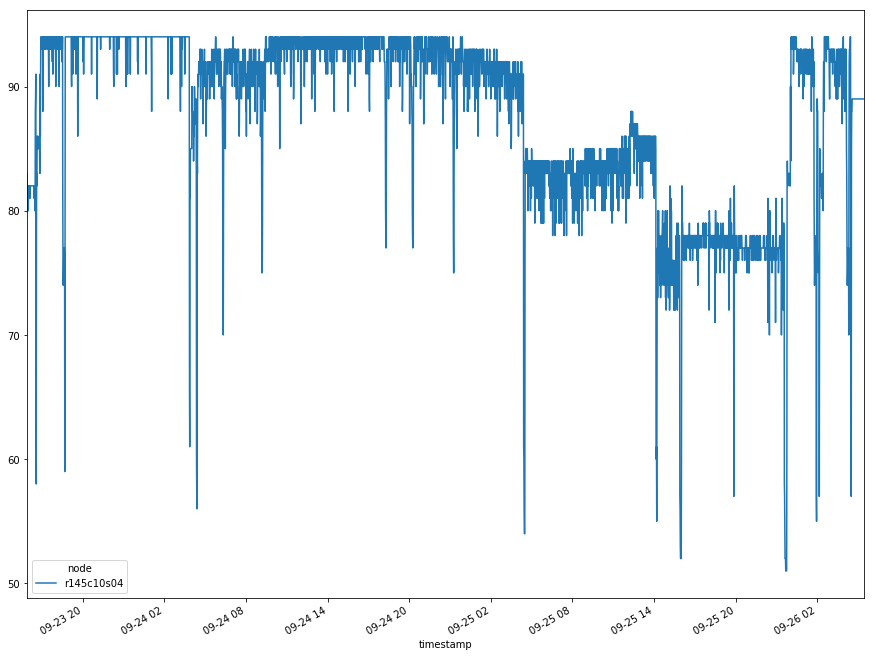

In [28]:
data = sq.SELECT('*') \
    .FROM('CPU_1_Temp') \
    .WHERE(node='r145c10s04') \
    .TSTART('23-09-2019 15:54:00') \
    .TSTOP('26-09-2019 05:27:00') \
    .execute()

data.to_series(flat_index=True, interp='time', dropna=True, columns=['node']).df_ts.plot(figsize=[15,12])

Where we can see values greater than 90 °C for the CPU1

## Job scheduler data
<div class="alert alert-warning">
<b>NOTE</b> This is an experimental feature and is subject to change in future versions.
</div>

Currently the job scheduler data is collected as per-job data in plain Cassandra tables. The available tables in the database are
* **job_info_galileo**: Galileo jobs data
* **job_info_marconi**: Marconi jobs data

This is a description of the data currently stored (where available) for each executed job:

| Table fields          | Description                                                                          |
|-----------------------|--------------------------------------------------------------------------------------|
| account               | charge to specified account                                                          |
| accrue_time           | time job is eligible for running                                                     |
| admin_comment         | administrator's arbitrary comment                                                    |
| alloc_node            | local node and system id making the resource allocation                              |
| alloc_sid             | local sid making resource alloc                                                      |
| array_job_id          | job_id of a job array or 0 if N/A                                                    |
| array_max_tasks       | Maximum number of running tasks                                                      |
| array_task_id         | task_id of a job array                                                               |
| array_task_str        | string expression of task IDs in this record                                         |
| assoc_id              | association id for job                                                               |
| batch_features        | features required for batch script's node                                            |
| batch_flag            | 1 if batch: queued job with script                                                   |
| batch_host            | name of host running batch script                                                    |
| billable_tres         | billable TRES cache. updated upon resize                                             |
| bitflags              | Various job flags                                                                    |
| boards_per_node       | boards per node required by job                                                      |
| burst_buffer          | burst buffer specifications                                                          |
| burst_buffer_state    | burst buffer state info                                                              |
| command               | command to be executed, built from submitted  job's argv and NULL for salloc command |
| comment               | arbitrary comment                                                                    |
| contiguous            | 1 if job requires contiguous nodes                                                   |
| core_spec             | specialized core count                                                               |
| cores_per_socket      | cores per socket required by job                                                     |
| cpu_freq_gov          | cpu frequency governor                                                               |
| cpu_freq_max          | Maximum cpu frequency                                                                |
| cpu_freq_min          | Minimum cpu frequency                                                                |
| cpus_alloc_layout     | map: list of cpu allocated per node                                                  |
| cpus_allocated        | map: number of cpu allocated per node                                                 |
| cpus_per_task         | number of processors required for each task                                          |
| cpus_per_tres         | semicolon delimited list of TRES=# values                                            |
| dependency            | synchronize job execution with other jobs                                            |
| derived_ec            | highest exit code of all job steps                                                   |
| eligible_time         | time job is eligible for running                                                     |
| end_time              | time of termination, actual or expected                                              |
| exc_nodes             | comma separated list of excluded nodes                                               |
| exit_code             | exit code for job (status from wait call)                                            |
| features              | comma separated list of required features                                            |
| group_id              | group job submitted as                                                               |
| job_id                | job ID                                                                               |
| job_state             | state of the job, see enum job_states                                                |
| last_sched_eval       | last time job was evaluated for scheduling                                           |
| licenses              | licenses required by the job                                                         |
| max_cpus              | maximum number of cpus usable by job                                                 |
| max_nodes             | maximum number of nodes usable by job                                                |
| mem_per_cpu           | boolean                                                                              |
| mem_per_node          | boolean                                                                              |
| mem_per_tres          | semicolon delimited list of TRES=# values                                            |
| min_memory_cpu        | minimum real memory required per allocated CPU                                       |
| min_memory_node       | minimum real memory required per node                                                |
| name                  | name of the job                                                                      |
| network               | network specification                                                                |
| nice                  | requested priority change                                                            |
| nodes                 | list of nodes allocated to job                                                       |
| ntasks_per_board      | number of tasks to invoke on each board                                              |
| ntasks_per_core       | number of tasks to invoke on each core                                               |
| ntasks_per_core_str   | number of tasks to invoke on each core  as string                                    |
| ntasks_per_node       | number of tasks to invoke on each node                                               |
| ntasks_per_socket     | number of tasks to invoke on each socket                                             |
| ntasks_per_socket_str | number of tasks to invoke on each socket as string                                   |
| num_cpus              | minimum number of cpus required by job                                               |
| num_nodes             | minimum number of nodes required by job                                              |
| partition             | name of assigned partition                                                           |
| pn_min_cpus           | minimum # CPUs per node, default=0                                                   |
| pn_min_memory         | minimum real memory per node, default=0                                              |
| pn_min_tmp_disk       | minimum tmp disk per node, default=0                                                 |
| power_flags           | power management flags,  see SLURM_POWER_FLAGS_                                      |
| pre_sus_time          | time job ran prior to last suspend                                                   |
| preempt_time          | preemption signal time                                                               |
| priority              | relative priority of the job, 0=held, 1=required nodes DOWN/DRAINED                  |
| profile               | Level of acct_gather_profile {all / none}                                            |
| qos                   | Quality of Service                                                                   |
| reboot                | node reboot requested before start                                                   |
| req_nodes             | comma separated list of required nodes                                               |
| req_switch            | Minimum number of switches                                                           |
| requeue               | enable or disable job requeue option                                                 |
| resize_time           | time of latest size change                                                           |
| restart_cnt           | count of job restarts                                                                |
| resv_name             | reservation name                                                                     |
| run_time              | job run time (seconds)                                                               |
| run_time_str          | job run time (seconds) as string                                                     |
| sched_nodes           | list of nodes scheduled to be used for job                                           |
| shared                | 1 if job can share nodes with other jobs                                             |
| show_flags            | conveys level of details requested                                                   |
| sockets_per_board     | sockets per board required by job                                                    |
| sockets_per_node      | sockets per node required by job                                                     |
| start_time            | time execution begins, actual or expected                                            |
| state_reason          | reason job still pending or failed, see slurm.h:enum job_state_reason                |
| std_err               | pathname of job's stderr file                                                        |
| std_in                | pathname of job's stdin file                                                         |
| std_out               | pathname of job's stdout file                                                        |
| submit_time           | time of job submission                                                               |
| suspend_time          | time job last suspended or resumed                                                   |
| system_comment        | slurmctld's arbitrary comment                                                        |
| threads_per_core      | threads per core required by job                                                     |
| time_limit            | maximum run time in minutes or INFINITE                                              |
| time_limit_str        | maximum run time in minutes or INFINITE as string                                    |
| time_min              | minimum run time in minutes or INFINITE                                              |
| tres_alloc_str        | tres used in the job as string                                                       |
| tres_bind             | Task to TRES binding directives                                                      |
| tres_freq             | TRES frequency directives                                                            |
| tres_per_job          | semicolon delimited list of TRES=# values                                            |
| tres_per_node         | semicolon delimited list of TRES=# values                                            |
| tres_per_socket       | semicolon delimited list of TRES=# values                                            |
| tres_per_task         | semicolon delimited list of TRES=# values                                            |
| tres_req_str          | tres reqeusted in the job as string                                                  |
| user_id               | user the job runs as                                                                 |
| wait4switch           | Maximum time to wait for minimum switches                                            |
| wckey                 | wckey for job                                                                        |
| work_dir              | pathname of working directory                                                        |

### Query examples
Queries can be executed as usual but paying attention to the following limitations:

* both TSTART and TSTOP statements must be specified
* the date currently is supported only in the string format 
* pushdown filters (executed on the datastore) are available only for a subset of table columns:
 * job_id
 * job_state
 * account
 * user_id 
 * node (keys of __cpus_alloc_layout__ table column)

In [ ]:
# Ask for all galileo executed between '28-09-2019 08:09:00' and '30-09-2019 08:09:00'

data = sq.SELECT('*') \
    .FROM('job_info_galileo') \
    .TSTART('28-09-2019 08:09:00') \
    .TSTOP('30-09-2019 08:09:00') \
    .execute()  

df = pd.DataFrame(json.loads(data))
df.head()

In [ ]:
df.shape

In [ ]:
# Ask for all galileo jobs executed between '28-09-2019 08:09:00' and '30-09-2019 08:09:00', 
# allocated on node "r038c04s03"

data = sq.SELECT('*') \
    .FROM('job_info_galileo') \
    .WHERE(node='r038c04s03') \
    .TSTART('28-09-2019 08:09:00') \
    .TSTOP('30-09-2019 08:09:00') \
    .execute()  

df = pd.DataFrame(json.loads(data))
df.shape

In [ ]:
# Ask for all galileo jobs executed between '28-09-2019 08:09:00' and '30-09-2019 08:09:00', 
# allocated on node "r038c04s03" and job_state = 'FAILED

data = sq.SELECT('*') \
    .FROM('job_info_galileo') \
    .WHERE(node='r038c04s03', job_state='FAILED') \
    .TSTART('28-09-2019 08:09:00') \
    .TSTOP('30-09-2019 08:09:00') \
    .execute()  

df = pd.DataFrame(json.loads(data))
df.shape